In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.shape

(21597, 21)

In [5]:
data.shape

(21597, 21)

In [6]:
data["id"].value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [7]:
data=data.drop("id",axis=1)

In [8]:
data.shape

(21597, 20)

In [9]:
data["date"].value_counts()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
11/2/2014      1
1/31/2015      1
5/24/2015      1
5/17/2014      1
7/27/2014      1
Name: date, Length: 372, dtype: int64

In [10]:
data=data.drop("date",axis=1)

In [11]:
data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [12]:
def Cl(data):
    import numpy as np
    
    for i in range(len(data.columns)):
        
        y=data.iloc[:,i]
        out=[]
        mean=np.mean(y)
        std=np.std(y)
        for j in y:
            z=(j-mean)/std
            if(z>3):
                out.append(j)
        for m in out:
            data=data[data.iloc[:,i]!=m]
    return data
data1=Cl(data)

In [13]:
data1.shape

(18136, 19)

In [14]:
data=data1

<AxesSubplot: ylabel='Frequency'>

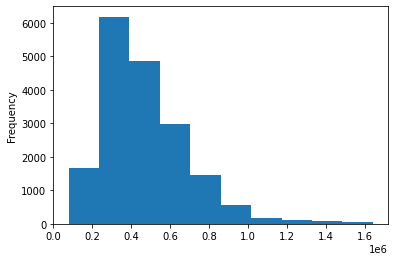

In [15]:
data["price"].plot(kind="hist")

In [16]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [17]:
normaltest(data.price.values)

NormaltestResult(statistic=4386.295453504134, pvalue=0.0)

In [18]:
x=data.drop("price",axis=1)
y=data["price"]

In [19]:
import numpy as np
y_mean=np.mean(y)
y_std=np.std(y)
y1=[]
for i in y:
    y1.append((i-y_mean)/y_std)

In [20]:
normaltest(y1)

NormaltestResult(statistic=4386.295453504133, pvalue=0.0)

<AxesSubplot: ylabel='Frequency'>

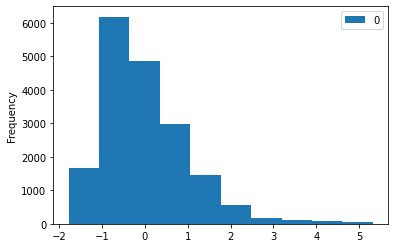

In [21]:
y1=pd.DataFrame(y1)
y1.plot(kind="hist")

In [22]:
from scipy.stats import boxcox

In [23]:
bc_result = boxcox(y)

In [24]:
bc_result

(array([13.78739148, 13.52645006, 15.0497403 , ..., 14.53406041,
        14.52744537, 14.26576036]),
 0.018079793772017013)

In [25]:
y2 = bc_result[0]
y2

array([13.78739148, 13.52645006, 15.0497403 , ..., 14.53406041,
       14.52744537, 14.26576036])

In [26]:
y3 = bc_result[0]
y3

array([13.78739148, 13.52645006, 15.0497403 , ..., 14.53406041,
       14.52744537, 14.26576036])

In [27]:
normaltest(y2)

NormaltestResult(statistic=9.237614604482868, pvalue=0.009864554479690849)

<AxesSubplot: ylabel='Frequency'>

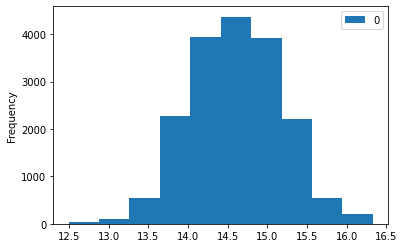

In [28]:
y2=pd.DataFrame(y2)
y2.plot(kind="hist")

In [29]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [30]:
y=y3
y

array([13.78739148, 13.52645006, 15.0497403 , ..., 14.53406041,
       14.52744537, 14.26576036])

In [31]:
from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
obj.fit(x)
x1=obj.transform(x)


In [32]:
x2=pd.DataFrame(x1)

In [33]:
x2.columns

RangeIndex(start=0, stop=18, step=1)

In [34]:
n=list(x.columns)
n

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [35]:
x2.columns=n

In [36]:
x2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.354063,-1.494894,-1.041804,-0.366995,-0.875512,0.0,-0.222119,-0.643154,-0.487521,-0.713381,-0.662416,-0.555435,0.0,1.844502,-0.347718,-0.256370,-0.953845,-0.403998
1,-1.535750,-1.494894,-1.635338,0.094715,-0.875512,0.0,-0.222119,-0.643154,-1.515264,-1.333704,-0.662416,-1.310593,0.0,-0.957312,1.264742,-0.067471,1.507949,-0.049488
2,0.827624,1.463574,0.087359,-0.435986,-0.875512,0.0,-0.222119,2.406720,-0.487521,-0.910069,1.766779,-0.212181,0.0,1.059994,-0.279436,-1.326803,-0.918167,-0.499534
3,-0.354063,-0.015660,-0.317981,-0.109074,-0.875512,0.0,-0.222119,-0.643154,0.540223,0.043110,-0.662416,0.542977,0.0,-0.098089,0.403388,1.412245,-0.133247,-0.131648
4,-0.354063,0.354148,-0.267314,-0.242917,0.974996,0.0,-0.222119,-0.643154,-0.487521,0.096064,-0.662416,0.817580,0.0,-1.424282,-1.780937,-0.807328,0.648105,-0.232181


In [37]:
#Lets check Multicolinarity in Data

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["columns"] = X.columns
    vif["VIF_Score"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

m=calc_vif(x2)

c:\python\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\python\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [39]:
m

,columns,VIF_Score
0,bedrooms,1.724409
1,bathrooms,3.062788
2,sqft_living,inf
3,sqft_lot,2.888882
4,floors,2.241351
5,waterfront,NaN
6,view,1.074858
7,condition,1.257118
8,grade,2.705239
9,sqft_above,inf


In [40]:
m1=m.query('VIF_Score<5')
m1

,columns,VIF_Score
0,bedrooms,1.724409
1,bathrooms,3.062788
3,sqft_lot,2.888882
4,floors,2.241351
6,view,1.074858
7,condition,1.257118
8,grade,2.705239
11,yr_built,2.530629
13,zipcode,1.695116
14,lat,1.190876


In [41]:
m2=list(m1["columns"])
m2

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [42]:
x_final=data[m2]

In [43]:
x_final.head()

,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,5650,1.0,0,3,7,1955,98178,47.5112,-122.257,1340,5650
2,2,1.00,10000,1.0,0,3,6,1933,98028,47.7379,-122.233,2720,8062
3,4,3.00,5000,1.0,0,5,7,1965,98136,47.5208,-122.393,1360,5000
4,3,2.00,8080,1.0,0,3,8,1987,98074,47.6168,-122.045,1800,7503
6,3,2.25,6819,2.0,0,3,7,1995,98003,47.3097,-122.327,2238,6819


In [44]:
x.shape

(18136, 18)

In [45]:
x_final.shape

(18136, 13)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final,y, test_size = 1/3, random_state = 0)

In [47]:
from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
obj.fit(x_train)
x_train=obj.transform(x_train)
x_test=obj.transform(x_test)

In [48]:
x_train.shape

(12090, 13)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [50]:
#from sklearn.linear_model import Ridge
#model = Ridge()
#model.fit(x_train,y_train)

In [51]:
model.n_features_in_

13

In [52]:
np.array(m2)

array(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'condition',
       'grade', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'], dtype='<U13')

In [53]:
model.coef_

array([ 0.01694009,  0.10888306,  0.02676125,  0.04664516,  0.03647128,
        0.05741504,  0.23480546, -0.15414272, -0.02970717,  0.25362466,
       -0.0053161 ,  0.12334653, -0.04790046])

In [54]:
model.intercept_

14.603447977048129

In [55]:
model.rank_

13

In [56]:
#model.singular_

In [57]:
y_pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE",rmse)
r2_score(y_test,y_pred)

RMSE 0.31323051205891433


0.6882650498756274

In [58]:
model.score(x_train,y_train)

0.7060737655430306

In [59]:
model.score(x_test,y_test)

0.6882650498756274

In [60]:
np.array(m2)

array(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'condition',
       'grade', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'], dtype='<U13')

In [61]:
# import numpy as np
# json={'Income':50000, 'Age':30}
# data = json.
# prediction = model.predict([np.array(list(data.values()))])

# output = prediction[0]
# #jsonify(output)
# prediction

In [62]:
import pickle

In [63]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [64]:
pickle_in=open("classifier.pkl","rb")
classifier=pickle.load(pickle_in)

In [65]:
classifier.predict([[2,58,29,2,29,5,2,5,2,53,3,5,2]])

array([36.75322826])